In [1]:
import requests
from bs4 import BeautifulSoup as bs
import json
from collections import Counter
from matplotlib import pyplot as plt
import itertools
import numpy as np
import time
import pickle

In [2]:
#root = "https://www.triforceblitz.com"
#seeddir = "/seed/daily/all"
#seeds = []


while True: 
    r = requests.get(root + seeddir)
    soup = bs(r.text, 'html.parser')
    seeddir = ''
    for link in soup.find_all('a'): 
        file = link.get('href')
        if "spoiler-log" in file: 
            time.sleep(0.3)
            spoiler = requests.get(root+file)
            seeds.append(json.loads(spoiler.text))
        if "Next" in link.text:
            seeddir = link.get('href')
            print(seeddir)
    if not seeddir:
        break

NameError: name 'root' is not defined

In [46]:
class Seed():
    def __init__(self, json): 
        self.locations = json['locations']
        self.path = json[':goal_locations']['triforce_hunt']
        self.dungeons = ['Deku Tree', 'Dodongos Cavern', 'Jabu Jabus Belly', 'Bottom of the Well', 
                         'Forest Temple', 'Fire Temple', 'Water Temple', 'Shadow Temple', 
                         'Spirit Temple', 'Ice Cavern', 'Gerudo Training Ground', 'Ganons']
        
        self.path_items, self.req_items = self.parse_items()
        
        self.triforce_locations = [list(self.locations.keys())[list(self.locations.values()).index('Triforce of Power')],
                                   list(self.locations.keys())[list(self.locations.values()).index('Triforce of Wisdom')],
                                   list(self.locations.keys())[list(self.locations.values()).index('Triforce of Courage')]]
        self.triforce_dungeons = [list(itertools.compress(self.dungeons, map(triforce.__contains__, self.dungeons)))[0] for triforce in self.triforce_locations]
        self.zipped = list(itertools.zip_longest(self.path_items, self.triforce_dungeons, fillvalue=[]))
        self.length = [len(triforce[0]) for triforce in self.zipped]
        del self.locations
        
    def parse_items(self):
        path_items = []
        path_items.append(self.path.get('Path of power', self.path.get('The path of power', [])))
        path_items.append(self.path.get('Path of wisdom', self.path.get('The path of wisdom', [])))
        path_items.append(self.path.get('Path of courage', self.path.get('The path of courage', [])))
        for i, path in enumerate(path_items):
            if not path: 
                continue
            path_items[i] = [item if type(item)==str else item.get('item') for item in path.values()]
        for ind, path in enumerate(path_items): 
            hook_ind = [index for index, item in enumerate(path) if item == "Progressive Hookshot"]
            if len(hook_ind) > 0: 
                path_items[ind][hook_ind[0]] = 'Hookshot'
            if len(hook_ind) > 1: 
                path_items[ind][hook_ind[1]] = 'Longshot'
                
            wallet_ind = [index for index, item in enumerate(path) if item == "Progressive Wallet"]
            if len(wallet_ind) > 0: 
                path_items[ind][wallet_ind[0]] = 'Adult Wallet'
            if len(wallet_ind) > 1: 
                path_items[ind][wallet_ind[1]] = 'Giant Wallet'
                
            scale_ind = [index for index, item in enumerate(path) if item == "Progressive Scale"]
            if len(scale_ind) > 0: 
                path_items[ind][scale_ind[0]] = 'Silver Scale'
            if len(scale_ind) > 1: 
                path_items[ind][scale_ind[1]] = 'Gold Scale'
                
            strength_ind = [index for index, item in enumerate(path) if item == "Progressive Strength Upgrade"]
            if len(strength_ind) > 0: 
                path_items[ind][strength_ind[0]] = 'Strength 1'
            if len(strength_ind) > 1: 
                path_items[ind][strength_ind[1]] = 'Strength 2'
            if len(strength_ind) > 2: 
                path_items[ind][strength_ind[2]] = 'Strength 3'
        
        req_items = list(set(item for path in path_items for item in path))
        
        return path_items, req_items

In [65]:
seed_data = []
for seed in seeds: 
    seed_data.append(Seed(seed))

dict_data = [seed.__dict__ for seed in seed_data]
with open('Triforce_data.pkl', 'wb') as file: 
    pickle.dump(dict_data, file)

#np.save('Triforce_data.npy', [seed.__dict__ for seed in seed_data])

In [1]:
import pickle

with open('Triforce_data.pkl', 'rb') as file: 
    dict_data = pickle.load(file)
class Seed: 
    def __init__(self, **entries): 
        self.__dict__.update(entries)
seed_data = [Seed(**seed) for seed in dict_data]

In [4]:
seed_data[1].path

{'Path of power': {'Song from Saria': 'Requiem of Spirit',
  'Sheik at Colossus': 'Eponas Song'},
 'Path of wisdom': {'Song from Windmill': 'Zeldas Lullaby',
  'Graveyard Shield Grave Chest': 'Megaton Hammer',
  'HF Open Grotto Chest': 'Progressive Strength Upgrade',
  'LW Ocarina Memory Game': 'Hover Boots',
  'Song from Saria': 'Requiem of Spirit',
  'DMC Great Fairy Reward': 'Bomb Bag',
  'Song from Malon': 'Nocturne of Shadow',
  'GC Pot Freestanding PoH': 'Progressive Scale',
  'LH Underwater Item': 'Progressive Hookshot',
  'Fire Temple Boulder Maze Lower Chest': 'Progressive Strength Upgrade',
  'Fire Temple Compass Chest': 'Fire Arrows',
  'Spirit Temple Mirror Shield Chest': 'Dins Fire',
  'Shadow Temple Invisible Blades Visible Chest': 'Progressive Strength Upgrade'},
 'Path of courage': {'Song from Windmill': 'Zeldas Lullaby',
  'Graveyard Shield Grave Chest': 'Megaton Hammer',
  'HF Open Grotto Chest': 'Progressive Strength Upgrade',
  'LW Ocarina Memory Game': 'Hover Boots

<BarContainer object of 24 artists>

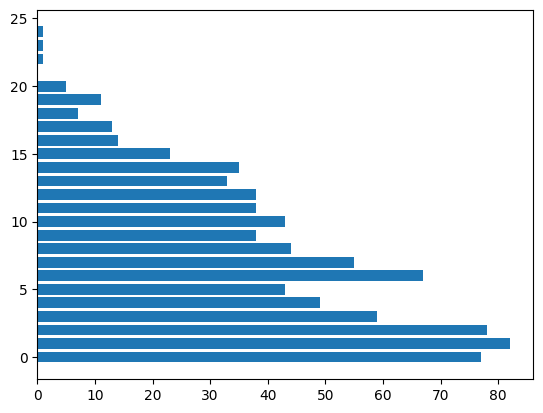

In [5]:
steps = [path_length for file in seed_data for path_length in file.length]
counted_steps = Counter(steps)

plt.barh(list(counted_steps.keys()), counted_steps.values())


In [100]:
print(counted_steps)
sum(counted_steps.values())
sum([count for steps, count in counted_steps.items() if steps > 17])

Counter({1: 82, 2: 78, 0: 77, 6: 67, 3: 59, 7: 55, 4: 49, 8: 44, 5: 43, 10: 43, 12: 38, 11: 38, 9: 38, 14: 35, 13: 33, 15: 23, 16: 14, 17: 13, 19: 11, 18: 7, 20: 5, 24: 1, 23: 1, 22: 1})


26

<BarContainer object of 12 artists>

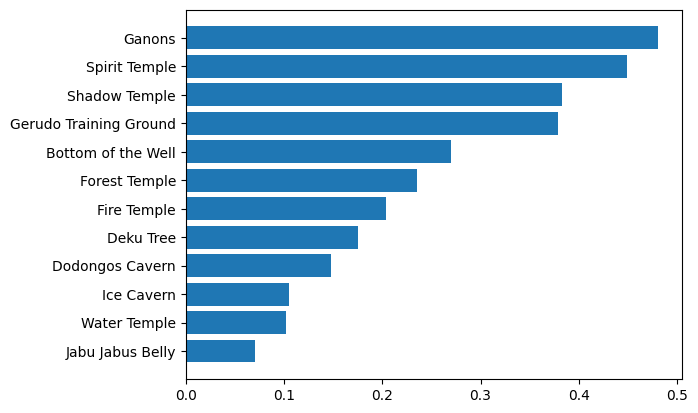

In [6]:
dungeons = [dungeon for file in seed_data for dungeon in file.triforce_dungeons]
counted_dungeons = Counter(dungeons)

counted_dungeons = dict(sorted(counted_dungeons.items(), key=lambda item: item[1]))

plt.barh(list(counted_dungeons.keys()), np.fromiter(counted_dungeons.values(),dtype=float)/len(seed_data))


dict_values([1, 1, 1, 1, 2, 5, 10, 10, 15, 16, 16, 20, 27, 43, 54, 55, 58, 66, 69, 71, 82, 99, 103, 104, 106, 110, 139, 147, 150, 159, 161, 163, 165, 166, 175, 180, 187, 210, 243])


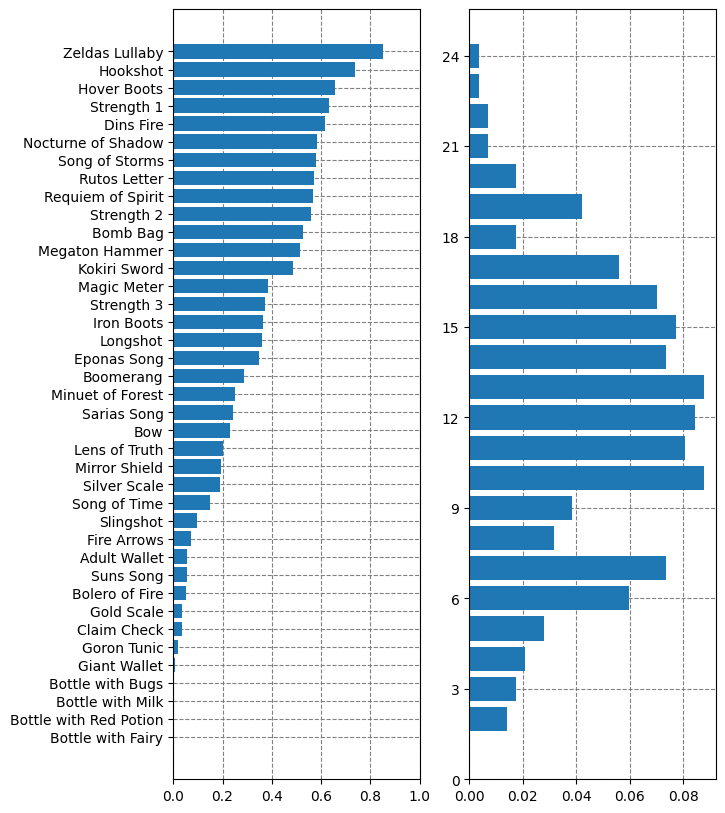

In [7]:
req_items = [items for file in seed_data for items in file.req_items]
counted_items = Counter(req_items)
counted_items = dict(sorted(counted_items.items(), key=lambda item: item[1]))

fig = plt.figure(figsize=(7,10))
ax = plt.subplot(1,2,1)
plt.barh(list(counted_items.keys()), np.fromiter(counted_items.values(),dtype=float)/len(seed_data))
plt.xlim(0, 1)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

print(counted_items.values())

counts = [len(file.req_items) for file in seed_data]
counted_paths = Counter(counts)

ax = plt.subplot(1,2,2)
plt.barh(list(counted_paths.keys()), np.fromiter(counted_paths.values(),dtype=float)/len(seed_data))
ax.set_axisbelow(True)
plt.yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
ax.grid(color='gray', linestyle='dashed')



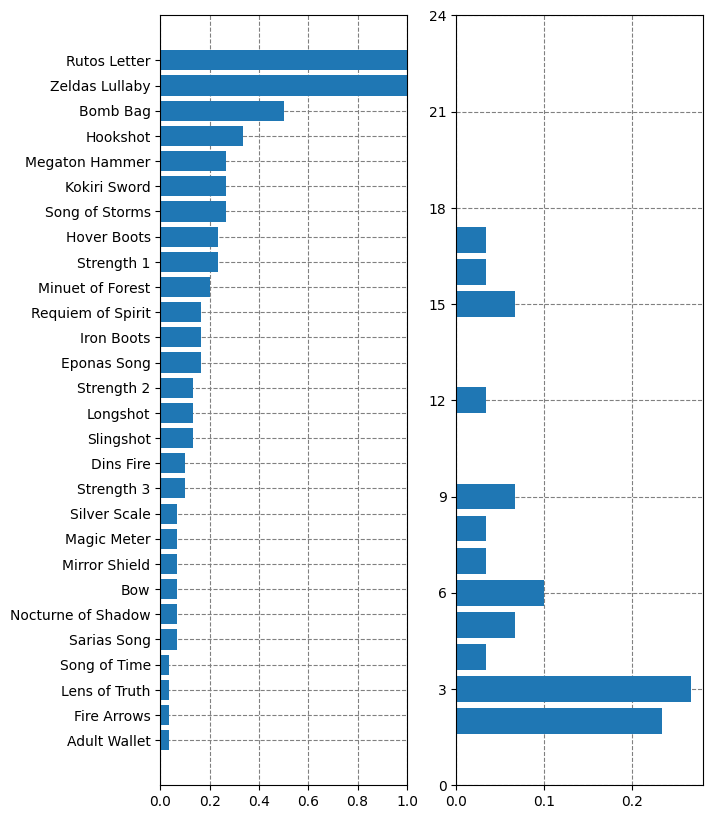

In [37]:
list_seeds = [triforce[0] for file in seed_data for triforce in file.zipped if triforce[1].__contains__('Ice')]
n_paths = len(list_seeds)

path_items = [items for path in list_seeds for items in path]
counted_items = Counter(path_items)
counted_items = dict(sorted(counted_items.items(), key=lambda item: item[1]))

fig = plt.figure(figsize=(7,10))
ax = plt.subplot(1,2,1)
plt.barh(list(counted_items.keys()), np.fromiter(counted_items.values(),dtype=float)/n_paths)
ax.set_axisbelow(True)
plt.xlim([0, 1])
ax.grid(color='gray', linestyle='dashed')

counts = [len(path) for path in list_seeds]
counted_paths = Counter(counts)

ax = plt.subplot(1,2,2)
plt.barh(list(counted_paths.keys()), np.fromiter(counted_paths.values(),dtype=float)/n_paths)
ax.set_axisbelow(True)
plt.yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
ax.grid(color='gray', linestyle='dashed')

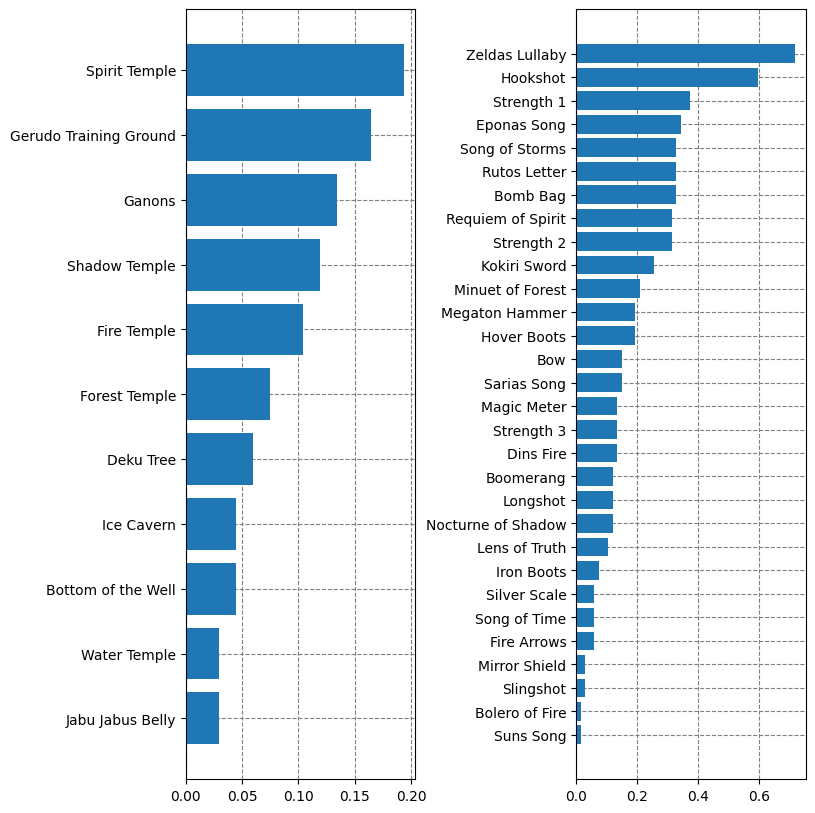

In [38]:
list_seeds = [triforce for file in seed_data for triforce in file.zipped if len(triforce[0]) == 6]
n_paths = len(list_seeds)

path_items = [items for triforce in list_seeds for items in triforce[0]]
counted_items = Counter(path_items)
counted_items = dict(sorted(counted_items.items(), key=lambda item: item[1]))

fig = plt.figure(figsize=(8,10))
ax = plt.GridSpec(1,2)
ax.update(wspace=0.7, hspace=0.5)

ax1 = plt.subplot(ax[0,1])
plt.barh(list(counted_items.keys()), np.fromiter(counted_items.values(),dtype=float)/n_paths)
ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='dashed')

location = [triforce[1] for triforce in list_seeds]
counted_locations = Counter(location)
counted_locations = dict(sorted(counted_locations.items(), key=lambda item: item[1]))

ax2 = plt.subplot(ax[0,0])
plt.barh(list(counted_locations.keys()), np.fromiter(counted_locations.values(),dtype=float)/n_paths)
ax2.set_axisbelow(True)
ax2.grid(color='gray', linestyle='dashed')



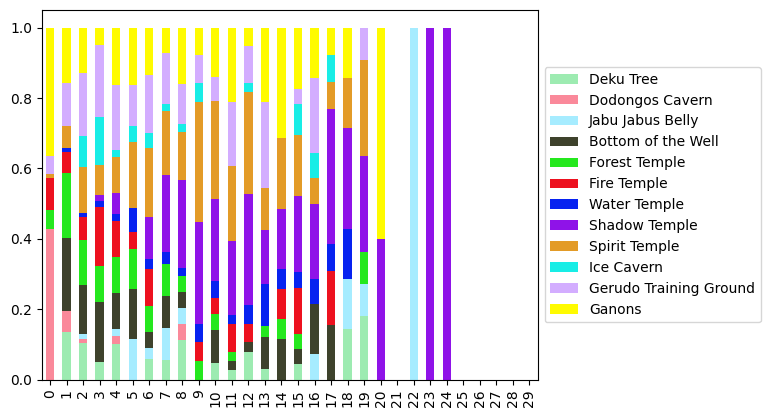

In [88]:
list_seeds = [[len(triforce[0]), triforce[1]] for file in seed_data for triforce in file.zipped]
step_seeds = [[seed for seed in list_seeds if seed[0] == i] for i in range(30)]
counted_seeds = [dict(Counter([seed[1] for seed in count])) for count in step_seeds]

import pandas as pd
df = pd.DataFrame(counted_seeds).fillna(0)
df = df.div(df.sum(axis=1), axis=0)
df = df.reindex(sorted(df.columns, key=lambda location: seed_data[0].dungeons.index(location)), axis=1)
colors = ['#9debb1', '#fa899a', '#a6ecff', '#3e422c', '#25e81e', '#ed111f', '#0722f0', 
          '#8f13e8', '#e39b27', '#18ede6', '#d3adff', '#fffb00']
df.plot.bar(stacked = True, color=colors).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [11]:
for seed in seed_data: 
    if 24 in seed.length: 
        print(seed.path['Path of power'])

{'Song from Windmill': 'Song of Time', 'Song from Saria': 'Zeldas Lullaby', 'Sheik in Forest': 'Bolero of Fire', 'Sheik in Crater': 'Suns Song', 'Graveyard Heart Piece Grave Chest': 'Progressive Scale', 'ZD Chest': 'Bomb Bag', 'HC Great Fairy Reward': 'Lens of Truth', 'GC Maze Center Chest': 'Progressive Hookshot', 'SFM Wolfos Grotto Chest': 'Magic Meter', 'LH Freestanding PoH': 'Progressive Strength Upgrade', 'DMC Volcano Freestanding PoH': 'Progressive Strength Upgrade', 'Dodongos Cavern Bomb Bag Chest': 'Goron Tunic', 'Dodongos Cavern End of Bridge Chest': 'Megaton Hammer', 'Ganons Castle Shadow Trial Front Chest': 'Bow', 'Fire Temple Highest Goron Chest': 'Rutos Letter', 'Sheik in Ice Cavern': 'Eponas Song', 'Gerudo Training Ground Lobby Left Chest': 'Iron Boots', 'Gerudo Training Ground Lobby Right Chest': 'Dins Fire', 'Gerudo Training Ground Maze Right Central Chest': 'Kokiri Sword', 'ZF Bottom Freestanding PoH': 'Progressive Hookshot', 'Deku Tree Basement Chest': 'Mirror Shield'